<a href="https://colab.research.google.com/github/vishal786-commits/machine-learning-journey/blob/main/classical-ml/logistic-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Authored by** [Vishal Gopalkrishna](https://github.com/vishal786-commits) 🚀 follow for more ❤️

### SKlearn Implementation of Logistic Regression


Churn Prediction in Telecommunication Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Download Dataset
!gdown 1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m

Downloading...
From: https://drive.google.com/uc?id=1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m
To: /content/churn_logistic.csv
100% 494k/494k [00:00<00:00, 35.7MB/s]


In [ ]:
churn = pd.read_csv("churn_logistic.csv")
churn.head(5)

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


In [ ]:
churn.shape

(5700, 21)

In [ ]:
churn.columns

Index(['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Intl Plan', 'VMail Plan', 'Day Calls',
       'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge',
       'Intl Calls', 'Intl Charge', 'State', 'Area Code', 'Phone', 'Churn'],
      dtype='object')

In [ ]:
# Based on simple EDA, I have chosed the following features to build the model

cols = ['Day Mins', 'Eve Mins', 'Night Mins', 'CustServ Calls', 'Account Length']
y = churn['Churn']
X = churn[cols]

In [ ]:
X.head(5)

,Day Mins,Eve Mins,Night Mins,CustServ Calls,Account Length
0,265.1,197.4,244.7,1,128
1,161.6,195.5,254.4,1,107
2,243.4,121.2,162.6,0,137
3,299.4,61.9,196.9,2,84
4,166.7,148.3,186.9,3,75


In [ ]:
X.shape

(5700, 5)

Let us split the data into training, validation and test.

In [ ]:
from sklearn.model_selection import train_test_split

# Step 1: Split into 80% training+validation and 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=1 # random_state=1 ensures the split is reproducible
)

# Step 2: Split the 80% into:
# 60% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size=0.25,  # 25% of 80% = 20% of total
    random_state=1 # random_state=1 ensures the split is reproducible
)

# Check training shape
print(X_train.shape)


(3420, 5)


  1. train_test_split separates 20% of the data into a test set (X_test, y_test) and keeps 80% for training and validation (X_train_val, y_train_val).
  2. The remaining 80% is split again, where 25% of it (which equals 20% of the original dataset) becomes the validation set (X_val, y_val), and the remaining 60% becomes the final training set (X_train, y_train).

In [ ]:
# we will Scale our data before fitting the model
from sklearn.preprocessing import StandardScaler

# Step 1: Create the scaler object
scaler = StandardScaler()

# Step 2: Fit the scaler ONLY on the training data
# (learns the mean and standard deviation from X_train)
scaler.fit(X_train)

# Step 3: Transform all datasets using the same scaler
X_train = scaler.transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

In [ ]:
X_train[:5, :5]

array([[-1.8525591 , -0.54121117,  1.87596728,  0.0724823 ,  2.13378709],
       [ 0.93155078,  1.05292599,  0.39854651, -0.54879454, -0.81991418],
       [ 0.46912157,  0.11462924,  1.13324217,  0.0724823 , -2.27130187],
       [-0.95630455,  1.07033768,  0.83013002,  0.0724823 , -0.25972945],
       [-0.94200262,  0.11656387, -0.69346015,  1.31503598,  1.6499912 ]])

We now implement Logistic Regression.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

This code imports the LogisticRegression class (a blueprint for creating logistic regression models), creates an instance of that class with model = LogisticRegression() *(which makes an actual model object in memory)*, and then trains that specific model using model.fit(X_train, y_train).

It learns the best coefficients from the training data to map input features (X_train) to target labels (y_train); after this step, the trained model stores the learned weights internally and is ready to make predictions on new data.

In [ ]:
# Let us now look at the weights
print("Weights (coefficients):", model.coef_)
print("Bias (intercept):", model.intercept_)

Weights (coefficients): [[0.68445262 0.29104301 0.1363756  0.79630985 0.06125924]]
Bias (intercept): [-0.01220319]


Model Evaluation - Accuracy

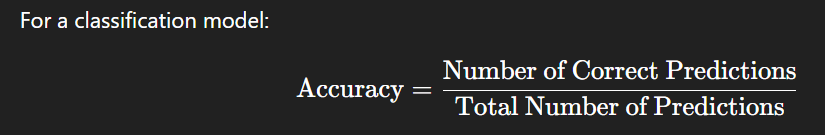

In [ ]:
# Custom accuracy function
def accuracy(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    correct_predictions = np.sum(y_true == y_pred)
    total_samples = len(y_true)

    return correct_predictions / total_samples

In [ ]:
# Generate predictions
y_train_pred = model.predict(X_train)
y_val_pred   = model.predict(X_val)

# Compute accuracy
train_accuracy = accuracy(y_train, y_train_pred)
val_accuracy   = accuracy(y_val, y_val_pred)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Training Accuracy: 0.7058479532163743
Validation Accuracy: 0.6982456140350877


The training accuracy **(70.6%)** and validation accuracy **(69.8%)** are very close, which means the model is generalizing well and not overfitting to the training data.

However, since both scores are relatively moderate, the model may be underfitting.

This is a good point to try hyperparameter tuning by adjusting regularization strength to potentially improve performance.

### Hyperparameter tuning

**What is Regularization Strength?**

Regularization strength controls how much we restrict the model from becoming too "complex" or sensitive to the training data.

* Strong regularization → smaller weights → simpler model → less overfitting

* Weak regularization → larger weights → more complex model

Neither strong nor weak regularization is “always good” — the best one is the one that gives the highest validation accuracy.

* Too strong regularization → model is too simple → underfitting

* Too weak regularization → model is too complex → overfitting

**Balanced regularization → good generalization**

In sklearn, this is controlled by parameter C:

* Small C → strong regularization

* Large C → weak regularization


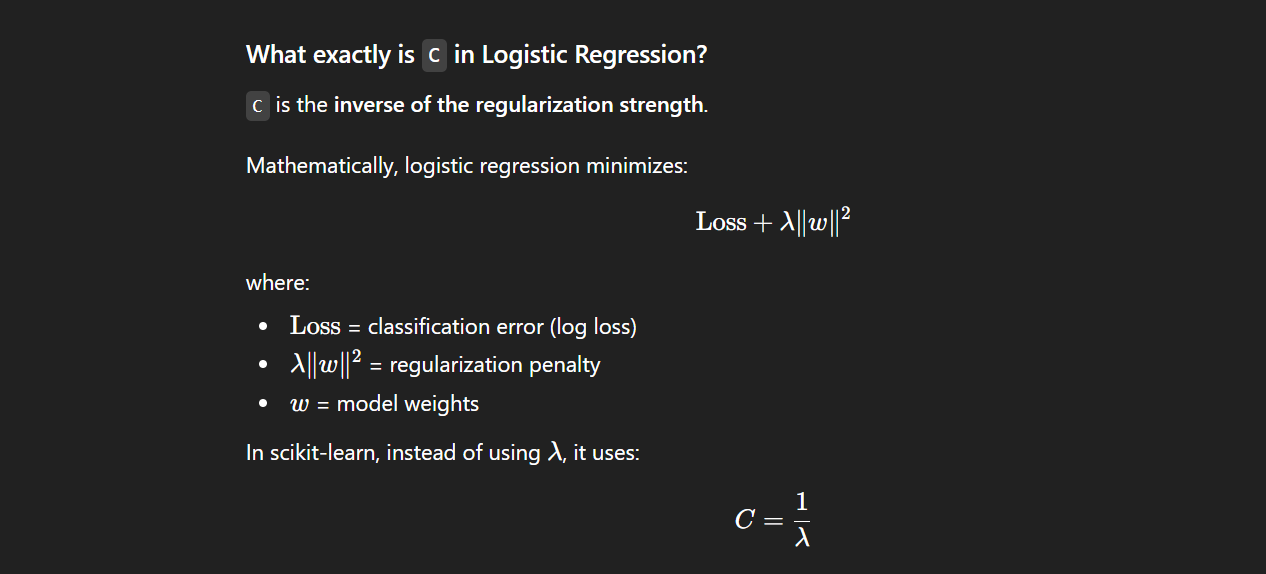

This code loops over different values of regularization strength **(λ)**, converts each to C = 1/λ, and trains a Logistic Regression model for each value to see how performance changes.

In [ ]:
from sklearn.pipeline import make_pipeline

train_scores = []
val_scores = []

# Try different values of lambda (regularization strength)
lambda_values = np.arange(0.01, 5000.0, 100)

for lam in lambda_values:

    model = make_pipeline(
        StandardScaler(),
        LogisticRegression(C=1/lam, max_iter=1000)
    )

    model.fit(X_train, y_train)

    train_accuracy = model.score(X_train, y_train)
    val_accuracy   = model.score(X_val, y_val)

    train_scores.append(train_accuracy)
    val_scores.append(val_accuracy)

The *make_pipeline* function creates a single model that first applies StandardScaler (to scale the features) and then trains LogisticRegression, ensuring scaling happens automatically before fitting and predicting.

For each λ, the model is trained on X_train, and both training and validation accuracies are stored.

Let us plot the training and validation scores and select the regularization parameter λ that produces the highest validation accuracy.

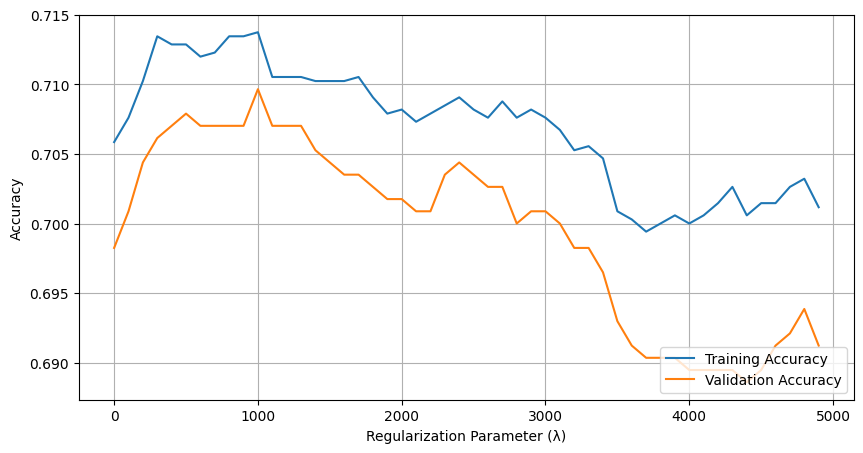

In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(lambda_values, train_scores, label="Training Accuracy")
plt.plot(lambda_values, val_scores, label="Validation Accuracy")

plt.xlabel("Regularization Parameter (λ)")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.grid(True)

plt.show()

From the plot, validation accuracy increases at first as λ grows *(stronger regularization)*, reaches a peak around roughly **λ ≈ 800–1100**, and then gradually declines as λ becomes too large.

 This suggests that small λ values may allow slight overfitting, while very large λ values cause underfitting due to overly strong regularization.

 The best choice of λ is near the peak validation accuracy **(around ~1000)**, since that is where the model generalizes best.

In [ ]:
from sklearn.metrics import accuracy_score

# Set lambda
lam = 1000
C_value = 1 / lam

# Create model with best regularization
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(C=C_value, max_iter=1000)
)

# Train model
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_val_pred   = model.predict(X_val)
y_test_pred  = model.predict(X_test)

# Accuracy scores
train_acc = accuracy_score(y_train, y_train_pred)
val_acc   = accuracy_score(y_val, y_val_pred)
test_acc  = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_acc)
print("Validation Accuracy:", val_acc)
print("Test Accuracy:", test_acc)

Training Accuracy: 0.7137426900584796
Validation Accuracy: 0.7096491228070175
Test Accuracy: 0.7096491228070175


This is a small but meaningful improvement compared to your earlier results:

(~70.6% train / ~69.8% val).

Now we have:

* Training: 71.37%

* Validation: 70.96%

* Test: 70.96%

What this means:

* ✅ Both validation and test accuracy increased

* ✅ Validation ≈ Test → very good sign of generalization

* ✅ Training is only slightly higher → no strong overfitting

This suggests λ = 1000 improved model generalization and is a better regularization setting than before.